In [1]:
import numpy as np
import matplotlib.pyplot as plt
from gmm_em import *

In [2]:
z = np.array([.4, .6])
mus = np.array([[-2, -2], [2, -3]])
covs = np.array([[[1, 0], [0, .2]], [[1, 0], [0, .1]]])

In [3]:
colors = ['b', 'r']

In [4]:
X1 = np.empty((0, 2))
X2 = np.empty((0, 2))
for i in range(10):
    z_k = np.random.choice(np.arange(len(z)), p=z)
    if z_k == 0:
        X1 = np.vstack([X1, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])
    else:
        X2 = np.vstack([X2, np.random.multivariate_normal(mus[z_k], covs[z_k], size=100)])

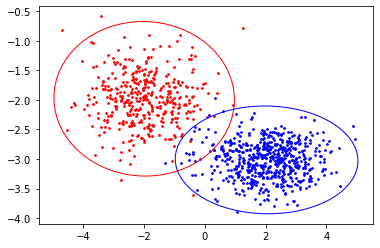

In [5]:
x1, y1 = X1.T
x2, y2 = X2.T
ax = plt.gca()
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)

### Initialize mean and covariance and pi

In [6]:
zc = np.array([.7, .3])
mc = np.array([[-4, -6], [4, 0]])


cc = np.array([[[.2, 0], [0, .2]], [[.2, 0], [0, .2]]])

In [7]:
X = np.vstack([X1, X2])
N = len(X)
K = len(zc)

In [8]:
X1_c = np.empty((0, 2))
X2_c = np.empty((0, 2))
zc = np.reshape(zc, (1, 2))[0]
for i in range(10):
    z_k = np.random.choice(np.arange(len(zc)), p=zc)
    if z_k == 0:
        X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    else:
        X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])

x1_c, y1_c = X1_c.T
x2_c, y2_c = X2_c.T
ax = plt.gca()
confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
# Old confidences and data
confidence_ellipse(x1, y1, ax, edgecolor='red')
confidence_ellipse(x2, y2, ax, edgecolor='blue')
ax.scatter(x1, y1, c='red', s=3)
ax.scatter(x2, y2, c='blue', s=3)
plt.savefig("em_0")
plt.close()

In [9]:
ll = log_likelihood(N, K, mc, cc, zc, X)
new_ll = 1000000000000
print("Starting EM...")
image_nr = 1
while abs(ll - new_ll) > 1**-6:
    ll = new_ll
    resp = e_step(N, K, mc, cc, zc, X)
    mc, cc, zc = m_step(N, K, X, resp)
    print(mc)
    new_ll = log_likelihood(N, K, mc, cc, zc, X)
    
    X1_c = np.empty((0, 2))
    X2_c = np.empty((0, 2))
    zc = np.reshape(zc, (1, 2))[0]
    for i in range(10):
        z_k = np.random.choice(np.arange(len(zc)), p=zc)
        if z_k == 0:
            X1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
        else:
            X2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    
    x1_c, y1_c = X1_c.T
    x2_c, y2_c = X2_c.T
    ax = plt.gca()
    confidence_ellipse(x1_c, y1_c, ax, edgecolor='black')
    confidence_ellipse(x2_c, y2_c, ax, edgecolor='green')
    # Old confidences and data
    confidence_ellipse(x1, y1, ax, edgecolor='red')
    confidence_ellipse(x2, y2, ax, edgecolor='blue')
    ax.scatter(x1, y1, c='red', s=3)
    ax.scatter(x2, y2, c='blue', s=3)
    plt.savefig("em_" + str(image_nr))
    plt.close()
    image_nr += 1
    
print("Done!")

inner_sum: 8.786961710878289e-29
Outersum: -64.60169869779685
inner_sum: 1.0405032629765881e-21
Outersum: -112.91628114785536
inner_sum: 5.680008625333915e-31
Outersum: -182.55946627939414
inner_sum: 1.5883747172129176e-18
Outersum: -223.5432866502799
inner_sum: 7.17317803047477e-23
Outersum: -274.53239499277856
inner_sum: 2.0793777780027928e-19
Outersum: -317.549443055896
inner_sum: 3.447305638150783e-20
Outersum: -362.36355196430213
inner_sum: 1.5248158832152237e-27
Outersum: -424.1114758046886
inner_sum: 7.127513803594603e-26
Outersum: -482.0147257440639
inner_sum: 2.7989613604955512e-27
Outersum: -543.1552748492184
inner_sum: 4.5361708062823315e-23
Outersum: -594.602648766659
inner_sum: 6.829821545295637e-17
Outersum: -631.8252968023844
inner_sum: 1.710157265685262e-18
Outersum: -672.7352431417545
inner_sum: 7.533432142886486e-32
Outersum: -744.3986153837275
inner_sum: 5.271205515772753e-22
Outersum: -793.3932283425817
inner_sum: 4.146620986322309e-19
Outersum: -835.7200513270465
i

inner_sum: 2.6909076386809907e-26
Outersum: -20172.20585455667
inner_sum: 7.530578306158698e-24
Outersum: -20225.448924949378
inner_sum: 1.7666760063327253e-19
Outersum: -20268.628941897787
inner_sum: 2.0492400862010507e-19
Outersum: -20311.660589629904
inner_sum: 2.083577080678237e-25
Outersum: -20368.491130787792
inner_sum: 6.825309432991121e-17
Outersum: -20405.71443969048
inner_sum: 1.5359457628136655e-29
Outersum: -20472.060261063874
inner_sum: 7.837129801095385e-25
Outersum: -20527.566015718192
inner_sum: 8.408229786107503e-14
Outersum: -20557.672996057445
inner_sum: 9.989904812422317e-14
Outersum: -20587.607612295033
inner_sum: 2.1156005535829697e-16
Outersum: -20623.69963506106
inner_sum: 1.6495065392041486e-14
Outersum: -20655.435350186945
inner_sum: 1.3700077042528827e-16
Outersum: -20691.961895311484
inner_sum: 4.555176731114218e-16
Outersum: -20727.286992470064
inner_sum: 1.3557899205849184e-12
Outersum: -20754.6136293343
inner_sum: 3.0079130924458153e-16
Outersum: -20790.3

inner_sum: 8.075977428539048e-28
Outersum: -33720.167665505
inner_sum: 1.5586715470497546e-21
Outersum: -33768.078118571815
inner_sum: 1.1580927341034805e-19
Outersum: -33811.68046088149
inner_sum: 2.2054807047074897e-11
Outersum: -33836.21795141262
inner_sum: 1.072851062425464e-14
Outersum: -33868.38382306534
inner_sum: 2.821389765768521e-23
Outersum: -33920.30605061591
inner_sum: 1.5627975003274436e-11
Outersum: -33945.18800915413
inner_sum: 4.1555612891172176e-19
Outersum: -33987.5126784142
inner_sum: 5.622869666415702e-16
Outersum: -34022.62719775172
inner_sum: 4.7848709246739155e-15
Outersum: -34055.600515097074
inner_sum: 1.565246655506483e-25
Outersum: -34112.717099003
inner_sum: 2.1750118763824828e-13
Outersum: -34141.87367108699
inner_sum: 4.463760326182559e-11
Outersum: -34165.706115576664
inner_sum: 1.9493819475945986e-25
Outersum: -34222.60323052913
inner_sum: 2.1638498040828612e-14
Outersum: -34254.06753287909
inner_sum: 8.170233725606703e-13
Outersum: -34281.90064157177
i

[[-2.10925193 -2.06996306]
 [ 1.92838773 -2.91913835]]
inner_sum: [0.03975151]
Outersum: [-3.22510755]
inner_sum: [0.14291688]
Outersum: [-5.17059965]
inner_sum: [0.01641933]
Outersum: [-9.27989578]
inner_sum: [0.1079758]
Outersum: [-11.50574393]
inner_sum: [0.07729044]
Outersum: [-14.06592892]
inner_sum: [0.10540958]
Outersum: [-16.3158307]
inner_sum: [0.0307612]
Outersum: [-19.79733182]
inner_sum: [0.06659195]
Outersum: [-22.50650347]
inner_sum: [0.0964025]
Outersum: [-24.84572656]
inner_sum: [0.00041236]
Outersum: [-32.63934975]
inner_sum: [0.13498824]
Outersum: [-34.6419174]
inner_sum: [0.07134626]
Outersum: [-37.28212777]
inner_sum: [0.0841085]
Outersum: [-39.75777545]
inner_sum: [0.00332963]
Outersum: [-45.46267055]
inner_sum: [0.129378]
Outersum: [-47.50768744]
inner_sum: [0.02085466]
Outersum: [-51.3778652]
inner_sum: [0.02257324]
Outersum: [-55.16885514]
inner_sum: [0.1275952]
Outersum: [-57.22774769]
inner_sum: [0.12103814]
Outersum: [-59.33939729]
inner_sum: [0.10996867]
Out

inner_sum: [0.0019843]
Outersum: [-807.27778077]
inner_sum: [0.09939704]
Outersum: [-809.58641376]
inner_sum: [0.07125773]
Outersum: [-812.22786577]
inner_sum: [0.07201952]
Outersum: [-814.85868386]
inner_sum: [0.07544894]
Outersum: [-817.44298303]
inner_sum: [0.0703313]
Outersum: [-820.09752139]
inner_sum: [0.0406827]
Outersum: [-823.29947381]
inner_sum: [0.05182605]
Outersum: [-826.25933626]
inner_sum: [0.10716816]
Outersum: [-828.49269231]
inner_sum: [0.12954892]
Outersum: [-830.53638904]
inner_sum: [0.10456359]
Outersum: [-832.79434891]
inner_sum: [0.06119391]
Outersum: [-835.58805645]
inner_sum: [0.11904866]
Outersum: [-837.71627942]
inner_sum: [0.13072294]
Outersum: [-839.75095457]
inner_sum: [0.00893995]
Outersum: [-844.46817994]
inner_sum: [0.03142987]
Outersum: [-847.92817659]
inner_sum: [0.10954542]
Outersum: [-850.13959263]
inner_sum: [0.08564465]
Outersum: [-852.59714116]
inner_sum: [0.08122599]
Outersum: [-855.10766118]
inner_sum: [0.14026905]
Outersum: [-857.07185409]
inn

inner_sum: [0.07473725]
Outersum: [-1559.54423228]
inner_sum: [0.14736129]
Outersum: [-1561.45910024]
inner_sum: [0.12418357]
Outersum: [-1563.54509464]
inner_sum: [0.16642139]
Outersum: [-1565.33832689]
inner_sum: [0.15628327]
Outersum: [-1567.19441194]
inner_sum: [0.21021525]
Outersum: [-1568.75403524]
inner_sum: [0.10385748]
Outersum: [-1571.0187709]
inner_sum: [0.19167396]
Outersum: [-1572.67073039]
inner_sum: [0.09695013]
Outersum: [-1575.00428899]
inner_sum: [0.09299732]
Outersum: [-1577.37947358]
inner_sum: [0.18859815]
Outersum: [-1579.04761027]
inner_sum: [0.1975111]
Outersum: [-1580.66957079]
inner_sum: [0.20473487]
Outersum: [-1582.25561023]
inner_sum: [0.04814259]
Outersum: [-1585.28919818]
inner_sum: [0.14479634]
Outersum: [-1587.22162523]
inner_sum: [0.19463278]
Outersum: [-1588.85826591]
inner_sum: [0.11444102]
Outersum: [-1591.02596162]
inner_sum: [0.12944172]
Outersum: [-1593.07048618]
inner_sum: [0.14328756]
Outersum: [-1595.01338793]
inner_sum: [0.0402843]
Outersum: 

inner_sum: [0.19851277]
Outersum: [-2205.25369172]
inner_sum: [0.19878543]
Outersum: [-2206.86922101]
inner_sum: [0.12125837]
Outersum: [-2208.97905271]
inner_sum: [0.13737021]
Outersum: [-2210.96412841]
inner_sum: [0.1400138]
Outersum: [-2212.93014271]
inner_sum: [0.15019318]
Outersum: [-2214.82597565]
inner_sum: [0.19931159]
Outersum: [-2216.43886154]
inner_sum: [0.05625635]
Outersum: [-2219.3166979]
inner_sum: [0.18819441]
Outersum: [-2220.98697764]
inner_sum: [0.02265173]
Outersum: [-2224.77449675]
inner_sum: [0.02686806]
Outersum: [-2228.39131374]
inner_sum: [0.14881835]
Outersum: [-2230.2963426]
inner_sum: [0.17855839]
Outersum: [-2232.01918224]
inner_sum: [0.17666838]
Outersum: [-2233.75266308]
inner_sum: [0.0986897]
Outersum: [-2236.06843776]
inner_sum: [0.20817168]
Outersum: [-2237.63782994]
inner_sum: [0.13612554]
Outersum: [-2239.63200769]
inner_sum: [0.14566484]
Outersum: [-2241.55845458]
inner_sum: [0.03031344]
Outersum: [-2245.05461856]
inner_sum: [0.1369257]
Outersum: [-

Outersum: [-848.45385665]
inner_sum: [0.08238044]
Outersum: [-850.95026392]
inner_sum: [0.14437804]
Outersum: [-852.88558404]
inner_sum: [0.10797353]
Outersum: [-855.11145318]
inner_sum: [0.12454303]
Outersum: [-857.19455716]
inner_sum: [0.01529622]
Outersum: [-861.37470697]
inner_sum: [0.04034544]
Outersum: [-864.58498391]
inner_sum: [0.05919449]
Outersum: [-867.41191071]
inner_sum: [0.12159271]
Outersum: [-869.51898896]
inner_sum: [0.01530476]
Outersum: [-873.69858006]
inner_sum: [0.04113884]
Outersum: [-876.88938265]
inner_sum: [0.111527]
Outersum: [-879.08287123]
inner_sum: [0.00281911]
Outersum: [-884.95420523]
inner_sum: [0.05401298]
Outersum: [-887.87273607]
inner_sum: [0.00491112]
Outersum: [-893.18898912]
inner_sum: [0.04962442]
Outersum: [-896.19226126]
inner_sum: [0.0615824]
Outersum: [-898.97964041]
inner_sum: [0.02153524]
Outersum: [-902.81770487]
inner_sum: [0.11242383]
Outersum: [-905.00318419]
inner_sum: [0.1066495]
Outersum: [-907.2413917]
inner_sum: [0.04990136]
Outer

inner_sum: [0.09525344]
Outersum: [-1604.93784706]
inner_sum: [0.11886508]
Outersum: [-1607.06761325]
inner_sum: [0.03417863]
Outersum: [-1610.44376796]
inner_sum: [0.0745125]
Outersum: [-1613.04055635]
inner_sum: [0.07804116]
Outersum: [-1615.59107529]
inner_sum: [0.12627247]
Outersum: [-1617.66038854]
inner_sum: [0.2280262]
Outersum: [-1619.13868327]
inner_sum: [0.07608156]
Outersum: [-1621.71463258]
inner_sum: [0.01298604]
Outersum: [-1626.05851295]
inner_sum: [0.15908405]
Outersum: [-1627.89683556]
inner_sum: [0.23688916]
Outersum: [-1629.33699849]
inner_sum: [0.08892083]
Outersum: [-1631.75700731]
inner_sum: [0.21745821]
Outersum: [-1633.28275592]
inner_sum: [0.01061894]
Outersum: [-1637.82787177]
inner_sum: [0.11792546]
Outersum: [-1639.9655743]
inner_sum: [0.26099158]
Outersum: [-1641.30884145]
inner_sum: [0.03982565]
Outersum: [-1644.53208546]
inner_sum: [0.17757327]
Outersum: [-1646.26045741]
inner_sum: [0.08661916]
Outersum: [-1648.7066917]
inner_sum: [0.06810737]
Outersum: [

inner_sum: [0.05907558]
Outersum: [-2166.97092902]
inner_sum: [0.08058227]
Outersum: [-2169.48940566]
inner_sum: [0.18190081]
Outersum: [-2171.1936994]
inner_sum: [0.23014876]
Outersum: [-2172.66272879]
inner_sum: [0.07501339]
Outersum: [-2175.25281741]
inner_sum: [0.11283631]
Outersum: [-2177.43463448]
inner_sum: [0.05551187]
Outersum: [-2180.32579282]
inner_sum: [0.06280757]
Outersum: [-2183.09347244]
inner_sum: [0.23607791]
Outersum: [-2184.53706584]
inner_sum: [0.22885248]
Outersum: [-2186.01174353]
inner_sum: [0.07304862]
Outersum: [-2188.62837357]
inner_sum: [0.22958824]
Outersum: [-2190.09984139]
inner_sum: [0.12658872]
Outersum: [-2192.16665326]
inner_sum: [0.18439119]
Outersum: [-2193.85734901]
inner_sum: [0.05356383]
Outersum: [-2196.78423021]
inner_sum: [0.10857693]
Outersum: [-2199.00452655]
inner_sum: [0.23393047]
Outersum: [-2200.45725791]
inner_sum: [0.02511144]
Outersum: [-2204.14168976]
inner_sum: [0.22693091]
Outersum: [-2205.62479941]
inner_sum: [0.04125496]
Outersum

inner_sum: [0.04622258]
Outersum: [-810.12237695]
inner_sum: [0.08760771]
Outersum: [-812.55726317]
inner_sum: [0.07820502]
Outersum: [-815.10568457]
inner_sum: [0.10894223]
Outersum: [-817.32262215]
inner_sum: [0.14837429]
Outersum: [-819.23063938]
inner_sum: [0.13355982]
Outersum: [-821.24384519]
inner_sum: [0.07411571]
Outersum: [-823.84597291]
inner_sum: [0.1254607]
Outersum: [-825.92173563]
inner_sum: [0.10307494]
Outersum: [-828.19403459]
inner_sum: [0.02126807]
Outersum: [-832.04458308]
inner_sum: [0.11063059]
Outersum: [-834.24614176]
inner_sum: [0.12941941]
Outersum: [-836.29083869]
inner_sum: [0.08350308]
Outersum: [-838.7737105]
inner_sum: [0.14716974]
Outersum: [-840.6898792]
inner_sum: [0.10894605]
Outersum: [-842.90678169]
inner_sum: [0.12529867]
Outersum: [-844.98383672]
inner_sum: [0.01247952]
Outersum: [-849.36750333]
inner_sum: [0.04267527]
Outersum: [-852.52163898]
inner_sum: [0.0673054]
Outersum: [-855.22015378]
inner_sum: [0.12238697]
Outersum: [-857.32072113]
inne

Outersum: [-1466.98246271]
inner_sum: [0.15467486]
Outersum: [-1468.84889272]
inner_sum: [0.092214]
Outersum: [-1471.23253603]
inner_sum: [0.24610242]
Outersum: [-1472.63454351]
inner_sum: [0.28609045]
Outersum: [-1473.88599076]
inner_sum: [0.29249396]
Outersum: [-1475.11530202]
inner_sum: [0.14391605]
Outersum: [-1477.05382719]
inner_sum: [0.12819647]
Outersum: [-1479.10801844]
inner_sum: [0.09954634]
Outersum: [-1481.41515045]
inner_sum: [0.11813492]
Outersum: [-1483.55107835]
inner_sum: [0.25437725]
Outersum: [-1484.92001524]
inner_sum: [0.05731883]
Outersum: [-1487.77914131]
inner_sum: [0.22396114]
Outersum: [-1489.27542403]
inner_sum: [0.19860578]
Outersum: [-1490.89185746]
inner_sum: [0.23254654]
Outersum: [-1492.35052234]
inner_sum: [0.22784064]
Outersum: [-1493.8296312]
inner_sum: [0.2745666]
Outersum: [-1495.12219263]
inner_sum: [0.12768673]
Outersum: [-1497.18036809]
inner_sum: [0.28092606]
Outersum: [-1498.45003185]
inner_sum: [0.14389125]
Outersum: [-1500.38872936]
inner_su

inner_sum: [0.05115542]
Outersum: [-2130.83629879]
inner_sum: [0.07787033]
Outersum: [-2133.3890091]
inner_sum: [0.18214162]
Outersum: [-2135.09197984]
inner_sum: [0.2732883]
Outersum: [-2136.38920782]
inner_sum: [0.0904896]
Outersum: [-2138.79172815]
inner_sum: [0.13134484]
Outersum: [-2140.82165722]
inner_sum: [0.02638346]
Outersum: [-2144.45667533]
inner_sum: [0.06749731]
Outersum: [-2147.15234282]
inner_sum: [0.27480116]
Outersum: [-2148.4440503]
inner_sum: [0.27465871]
Outersum: [-2149.73627632]
inner_sum: [0.09181888]
Outersum: [-2152.12421369]
inner_sum: [0.23510514]
Outersum: [-2153.57193616]
inner_sum: [0.13990352]
Outersum: [-2155.53873839]
inner_sum: [0.21867839]
Outersum: [-2157.05889155]
inner_sum: [0.04554544]
Outersum: [-2160.14793642]
inner_sum: [0.13581559]
Outersum: [-2162.14439369]
inner_sum: [0.28011122]
Outersum: [-2163.41696222]
inner_sum: [0.02019191]
Outersum: [-2167.31943569]
inner_sum: [0.23526741]
Outersum: [-2168.76646819]
inner_sum: [0.05377214]
Outersum: [

inner_sum: [0.10208706]
Outersum: [-908.54788014]
inner_sum: [0.00618809]
Outersum: [-913.63300877]
inner_sum: [0.07539804]
Outersum: [-916.21798274]
inner_sum: [0.05082347]
Outersum: [-919.19737978]
inner_sum: [0.04982529]
Outersum: [-922.19661242]
inner_sum: [0.08222353]
Outersum: [-924.69492618]
inner_sum: [0.05233353]
Outersum: [-927.64504416]
inner_sum: [0.14848013]
Outersum: [-929.55234828]
inner_sum: [0.09499204]
Outersum: [-931.90631049]
inner_sum: [0.1062039]
Outersum: [-934.14870496]
inner_sum: [0.03742807]
Outersum: [-937.43403917]
inner_sum: [0.10341071]
Outersum: [-939.70308592]
inner_sum: [0.08594977]
Outersum: [-942.15707816]
inner_sum: [0.08511602]
Outersum: [-944.62081821]
inner_sum: [0.09482194]
Outersum: [-946.97657266]
inner_sum: [0.00240294]
Outersum: [-953.00763668]
inner_sum: [0.1287486]
Outersum: [-955.0575303]
inner_sum: [0.05124721]
Outersum: [-958.02862443]
inner_sum: [0.03308911]
Outersum: [-961.4371754]
inner_sum: [0.13539368]
Outersum: [-963.43674402]
inne

inner_sum: [0.30064451]
Outersum: [-1502.80548747]
inner_sum: [0.04984446]
Outersum: [-1505.80433545]
inner_sum: [0.23704849]
Outersum: [-1507.24382601]
inner_sum: [0.28587017]
Outersum: [-1508.49604353]
inner_sum: [0.11392958]
Outersum: [-1510.66821823]
inner_sum: [0.14894829]
Outersum: [-1512.5723743]
inner_sum: [0.21081877]
Outersum: [-1514.12913073]
inner_sum: [0.0618129]
Outersum: [-1516.91277391]
inner_sum: [0.06910979]
Outersum: [-1519.58483279]
inner_sum: [0.05450588]
Outersum: [-1522.49427942]
inner_sum: [0.04493026]
Outersum: [-1525.59692315]
inner_sum: [0.21902022]
Outersum: [-1527.11551438]
inner_sum: [0.29288931]
Outersum: [-1528.3434749]
inner_sum: [0.09567366]
Outersum: [-1530.69028716]
inner_sum: [0.3185842]
Outersum: [-1531.83415564]
inner_sum: [0.02274896]
Outersum: [-1535.61739158]
inner_sum: [0.02481882]
Outersum: [-1539.31354454]
inner_sum: [0.00777968]
Outersum: [-1544.16978397]
inner_sum: [0.08752633]
Outersum: [-1546.60559964]
inner_sum: [0.22977563]
Outersum: [

inner_sum: [0.04965034]
Outersum: [-2125.92617407]
inner_sum: [0.07798338]
Outersum: [-2128.47743365]
inner_sum: [0.1742906]
Outersum: [-2130.22446494]
inner_sum: [0.28678682]
Outersum: [-2131.47348108]
inner_sum: [0.09584303]
Outersum: [-2133.81852464]
inner_sum: [0.13816537]
Outersum: [-2135.79782859]
inner_sum: [0.02010249]
Outersum: [-2139.70474032]
inner_sum: [0.06957265]
Outersum: [-2142.37012411]
inner_sum: [0.28620782]
Outersum: [-2143.6211612]
inner_sum: [0.28853595]
Outersum: [-2144.86409679]
inner_sum: [0.09776615]
Outersum: [-2147.18927371]
inner_sum: [0.23082472]
Outersum: [-2148.65537033]
inner_sum: [0.14232112]
Outersum: [-2150.60503968]
inner_sum: [0.22923669]
Outersum: [-2152.07803993]
inner_sum: [0.0416956]
Outersum: [-2155.25539968]
inner_sum: [0.14312137]
Outersum: [-2157.19946192]
inner_sum: [0.29424517]
Outersum: [-2158.42280386]
inner_sum: [0.01795738]
Outersum: [-2162.44255813]
inner_sum: [0.23389006]
Outersum: [-2163.89546224]
inner_sum: [0.0573473]
Outersum: [

Outersum: [-776.22814687]
inner_sum: [0.06692977]
Outersum: [-778.9322583]
inner_sum: [0.04142257]
Outersum: [-782.11618762]
inner_sum: [0.03251706]
Outersum: [-785.54217796]
inner_sum: [0.08556507]
Outersum: [-788.00065611]
inner_sum: [0.12082146]
Outersum: [-790.11409749]
inner_sum: [0.10100877]
Outersum: [-792.40664543]
inner_sum: [0.10285051]
Outersum: [-794.68112412]
inner_sum: [0.13500609]
Outersum: [-796.68355949]
inner_sum: [0.14630792]
Outersum: [-798.60560132]
inner_sum: [0.0205587]
Outersum: [-802.49007263]
inner_sum: [0.0527281]
Outersum: [-805.4326794]
inner_sum: [0.08915469]
Outersum: [-807.85006178]
inner_sum: [0.07635461]
Outersum: [-810.42242863]
inner_sum: [0.11412695]
Outersum: [-812.59287251]
inner_sum: [0.14742482]
Outersum: [-814.50730943]
inner_sum: [0.13119378]
Outersum: [-816.53838923]
inner_sum: [0.07280101]
Outersum: [-819.15841462]
inner_sum: [0.12372506]
Outersum: [-821.24810804]
inner_sum: [0.10814207]
Outersum: [-823.47241745]
inner_sum: [0.02022292]
Oute

inner_sum: [0.07869132]
Outersum: [-1430.44660758]
inner_sum: [0.0907692]
Outersum: [-1432.84604285]
inner_sum: [0.3055675]
Outersum: [-1434.03162743]
inner_sum: [0.19658937]
Outersum: [-1435.65826555]
inner_sum: [0.01689212]
Outersum: [-1439.73917365]
inner_sum: [0.28846673]
Outersum: [-1440.98234917]
inner_sum: [0.25490888]
Outersum: [-1442.3491983]
inner_sum: [0.26622569]
Outersum: [-1443.67260916]
inner_sum: [0.2121508]
Outersum: [-1445.22306711]
inner_sum: [0.30901166]
Outersum: [-1446.39744339]
inner_sum: [0.1412812]
Outersum: [-1448.35444645]
inner_sum: [0.22911587]
Outersum: [-1449.82797387]
inner_sum: [0.31596895]
Outersum: [-1450.98008519]
inner_sum: [0.10570709]
Outersum: [-1453.22716846]
inner_sum: [0.14934007]
Outersum: [-1455.12869771]
inner_sum: [0.06969849]
Outersum: [-1457.7922744]
inner_sum: [0.20489005]
Outersum: [-1459.37755619]
inner_sum: [0.14560713]
Outersum: [-1461.30439934]
inner_sum: [0.16035547]
Outersum: [-1463.13476159]
inner_sum: [0.08949532]
Outersum: [-1

inner_sum: [0.30109955]
Outersum: [-2092.19810471]
inner_sum: [0.06733416]
Outersum: [-2094.89619237]
inner_sum: [0.29372654]
Outersum: [-2096.12129845]
inner_sum: [0.04304533]
Outersum: [-2099.26680004]
inner_sum: [0.03823996]
Outersum: [-2102.5306742]
inner_sum: [0.22599453]
Outersum: [-2104.01791868]
inner_sum: [0.16266682]
Outersum: [-2105.83396991]
inner_sum: [0.21646772]
Outersum: [-2107.36428375]
inner_sum: [0.14638152]
Outersum: [-2109.28582264]
inner_sum: [0.28420378]
Outersum: [-2110.54388641]
inner_sum: [0.20383302]
Outersum: [-2112.13434054]
inner_sum: [0.20330604]
Outersum: [-2113.72738336]
inner_sum: [0.05810954]
Outersum: [-2116.57280885]
inner_sum: [0.21153414]
Outersum: [-2118.12617774]
inner_sum: [0.22352206]
Outersum: [-2119.62442292]
inner_sum: [0.10598905]
Outersum: [-2121.86884243]
inner_sum: [0.04963601]
Outersum: [-2124.87188118]
inner_sum: [0.07849362]
Outersum: [-2127.41661913]
inner_sum: [0.17035865]
Outersum: [-2129.18646851]
inner_sum: [0.29112599]
Outersum

In [10]:
cc

array([[[ 1.01827686, -0.0176039 ],
        [-0.0176039 ,  0.18943241]],

       [[ 0.94612185,  0.00917897],
        [ 0.00917897,  0.08946609]]])

#### From here on is TODO

In [11]:
import pandas
data = pandas.read_csv("faithful.csv")
XF = data.loc[:, "eruptions":"waiting"].values

FileNotFoundError: [Errno 2] File b'faithful.csv' does not exist: b'faithful.csv'

In [ ]:
xf, yf = XF.T
plt.plot(xf, yf, 'o')

In [ ]:
zc = np.random.rand(2)
zc = zc / np.sum(zc)
mc1 = np.random.uniform(1, 5, (2, 1))
mc2 = np.random.uniform(40, 110, (2, 1))
mc = np.hstack([mc1, mc2])
print(mc)

from scipy import random, linalg
cc = []
for i in range(2):    
    size = 2
    A = random.rand(size, size)
    B = np.dot(A, A.transpose())
    cc.append(B)
cc = np.reshape(cc, (len(zc), 2, 2))

In [ ]:
N = len(XF)
K = len(zc)

In [ ]:
XF1_c = np.empty((0, 2))
XF2_c = np.empty((0, 2))
zc = np.reshape(zc, (1, 2))[0]
for i in range(10):
    z_k = np.random.choice(np.arange(len(zc)), p=zc)
    if z_k == 0:
        XF1_c = np.vstack([X1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    else:
        XF2_c = np.vstack([X2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])

xF1_c, yF1_c = X1_c.T
xF2_c, yF2_c = X2_c.T
ax = plt.gca()
confidence_ellipse(xF1_c, yF1_c, ax, edgecolor='green')
confidence_ellipse(xF2_c, yF2_c, ax, edgecolor='red')

ax.scatter(xf, yf, c='blue', s=3)
plt.savefig("em_f_0")
plt.close()

In [ ]:
XF

In [ ]:
ll = log_likelihood(N, K, mc, cc, zc, XF)
new_ll = 1000000000000
print("Starting EM...")
image_nr = 1
while abs(ll - new_ll) > 1**-6:
    ll = new_ll
    resp = e_step(N, K, mc, cc, zc, XF)
    mc, cc, zc = m_step(N, K, XF, resp)
    print(mc)
    new_ll = log_likelihood(N, K, mc, cc, zc, XF)
    
    
    XF1_c = np.empty((0, 2))
    XF2_c = np.empty((0, 2))
    zc = np.reshape(zc, (1, 2))[0]
    for i in range(10):
        z_k = np.random.choice(np.arange(len(zc)), p=zc)
        if z_k == 0:
            XF1_c = np.vstack([XF1_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
        else:
            XF2_c = np.vstack([XF2_c, np.random.multivariate_normal(mc[z_k], cc[z_k], size=100)])
    
    xF1_c, yF1_c = XF1_c.T
    xF2_c, yF2_c = XF2_c.T
    ax = plt.gca()
    confidence_ellipse(xF1_c, yF1_c, ax, edgecolor='green')
    confidence_ellipse(xF2_c, yF2_c, ax, edgecolor='red')
    
    ax.scatter(xf, yf, c='red', s=3)
    plt.savefig("em_f_" + str(image_nr))
    plt.close()
    print(image_nr)
    image_nr += 1
    
print("Done!")